### Importacion Librerias

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Analisis y Limpieza del Dataset

#### Conversion a dataframe del csv

In [7]:
df = pd.read_csv('data.csv')

#### Eliminar valores duplicados

In [8]:
df = df.drop_duplicates()

#### Verificar si hay columnas constantes

In [9]:
constantes = [col for col in df.columns if df[col].nunique() == 1]
if constantes:
    df.drop(columns=constantes, inplace=True)

#### Verificar y manejar valores nulos

In [10]:
if df.isnull().sum().sum() > 0:
    df.fillna(method='ffill', inplace=True)

#### Escalar los datos numéricos

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_close = MinMaxScaler()
df["Close"] = scaler_close.fit_transform(df[["Close"]])
df[["Open", "High", "Low", "Volume"]] = scaler.fit_transform(df[["Open", "High", "Low", "Volume"]])

### Zona de Modelo

#### Importación del Modelo

In [12]:
from sklearn import linear_model
modelo_regresion_lineal = linear_model.LinearRegression()

#### Separar las características (X) y la variable objetivo (y)

In [13]:
X = df[["Timestamp", "Open", "High", "Low", "Volume"]]
X["Timestamp"] = X["Timestamp"].astype(np.int64) // 10**9  # Convertir a segundos enteros para el modelo
y = df["Close"]

C:\Users\pedro\AppData\Local\Temp\ipykernel_14568\1010403389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Timestamp"] = X["Timestamp"].astype(np.int64) // 10**9  # Convertir a segundos enteros para el modelo


#### Dividir en conjuntos de entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Entrenar el modelo de regresión lineal

In [15]:
modelo_regresion_lineal.fit(X_train, y_train)

LinearRegression()

#### Hacer predicciones

In [16]:
y_pred = modelo_regresion_lineal.predict(X_test)
print(y_pred)

# Revertir el escalado de y_pred a su valor original
y_pred_original = scaler_close.inverse_transform(y_pred.reshape(-1, 1)).flatten()
# Mostrar los valores desnormalizados
print(y_pred_original)

y_pred_original = np.round(y_pred_original, 2)
print("Valores de cierre predichos:", y_pred_original)

# Predecir el valor de cierre para el siguiente día
X_nuevo = X.iloc[-1].copy()

# Añadir un día al último timestamp
X_nuevo["Timestamp"] += 24*60*60

# Predecir el valor de cierre
y_nuevo = modelo_regresion_lineal.predict([X_nuevo])
y_nuevo_original = scaler_close.inverse_transform(y_nuevo.reshape(-1, 1)).flatten()

print("Valor de cierre predicho para el siguiente día:", np.round(y_nuevo_original, 2))


[8.91889128e-03 3.79183831e-02 4.06742113e-03 ... 1.01865098e-05
 8.50066458e-02 3.97429278e-02]
[9.75568502e+02 4.13524293e+03 4.46970750e+02 ... 4.90988340e+00
 9.26580110e+03 4.33403839e+03]
Valores de cierre predichos: [9.75570e+02 4.13524e+03 4.46970e+02 ... 4.91000e+00 9.26580e+03
 4.33404e+03]
Valor de cierre predicho para el siguiente día: [102547.67]


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Gráficos

In [36]:
#hacemos una predicción
X_nuevo = X.iloc[-1].copy()	#tomamos el último registro
#agregamos 21 dias al último timestamp
X_nuevo["Timestamp"] += 25*24*60*60
y_nuevo = modelo_regresion_lineal.predict([X_nuevo])	#hacemos la predicción

print("Valor de cierre predicho para el siguiente día:", np.round(y_nuevo_original, 2))

Valor de cierre predicho para el siguiente día: [102547.67]


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


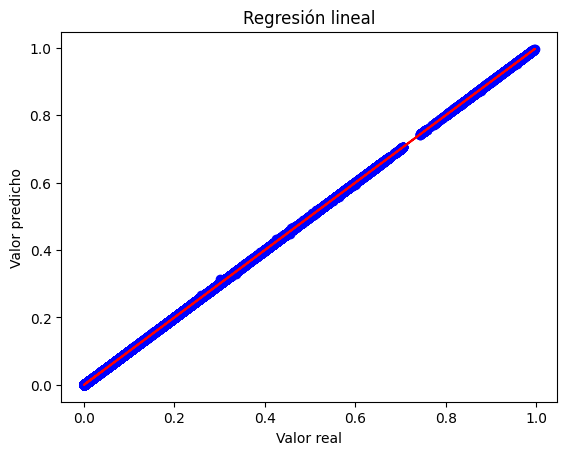

In [18]:
#plot de la regresión lineal con colores diferentes para los puntos y la línea
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("Regresión lineal")
plt.show()